### Professor: Dieval Guizelini
### Estudante: Clístenes Grizafis Bento

# Atividade 02: Aplicar GA para encontrar o menor trajeto entre as cidades.


## Instalação e importação das bibliotecas

In [23]:
import random
import matplotlib.pyplot as plt
import math
import cv2

## Criação das Variáveis

In [55]:
random.seed(5941) # Semente pseudo aleatória
num_cities = 100 # Número de cidades
cities = [(random.randint(0, 100), random.randint(0, 100)) for i in range(num_cities)] # Posições aleatórias para cidade em um mapa 100X100
population_size = 100 # Tamanho da população
num_generations = 100000 # Número de gerações
crossover_rate = 0.75 # Taxa de crossover (75%)
mutation_rate = 0.01 # Taxa de mutação (1%)

## Criação de métodos

### Distância entre duas cidades

In [4]:
def distance(city1, city2):
    return math.sqrt(math.pow( city1[0]-city2[0],2) + math.pow(city1[1]-city2[1],2))

### Distância total percorrida em uma rota

In [5]:
def total_distance(route):     
    return sum(distance(cities[route[i]], cities[route[i+1]]) for i in range(num_cities-1)) + distance(cities[route[num_cities-1]], cities[route[0]])

## Inverso da distância de uma rota

In [6]:
def fitness(route): 
  return 1 / total_distance(route)

## Ordena a população pelo fitness decrescente (inverso) e seleciona 50%

In [15]:
def selection(cities): 
    fitness_scores = [fitness(individual) for individual in population]
    scored_population = list(zip(population, fitness_scores))
    scored_population.sort(key=lambda x: x[1], reverse=True)
    selected = [individual for individual, score in scored_population[:population_size//2]]
    return selected

## Crossover com corte aleatório

In [9]:
def crossover(parent1, parent2):    
    cut = random.randint(0, num_cities-1)
    child1 = parent1[:cut] + [city for city in parent2 if city not in parent1[:cut]]
    child2 = parent2[:cut] + [city for city in parent1 if city not in parent2[:cut]]
    return child1, child2


## Método de mutação

In [10]:
def mutation(route):   
    position_random = 2
    i, j = random.sample(range(num_cities), position_random)
    route[i], route[j] = route[j], route[i]
    return route

## Aplicação

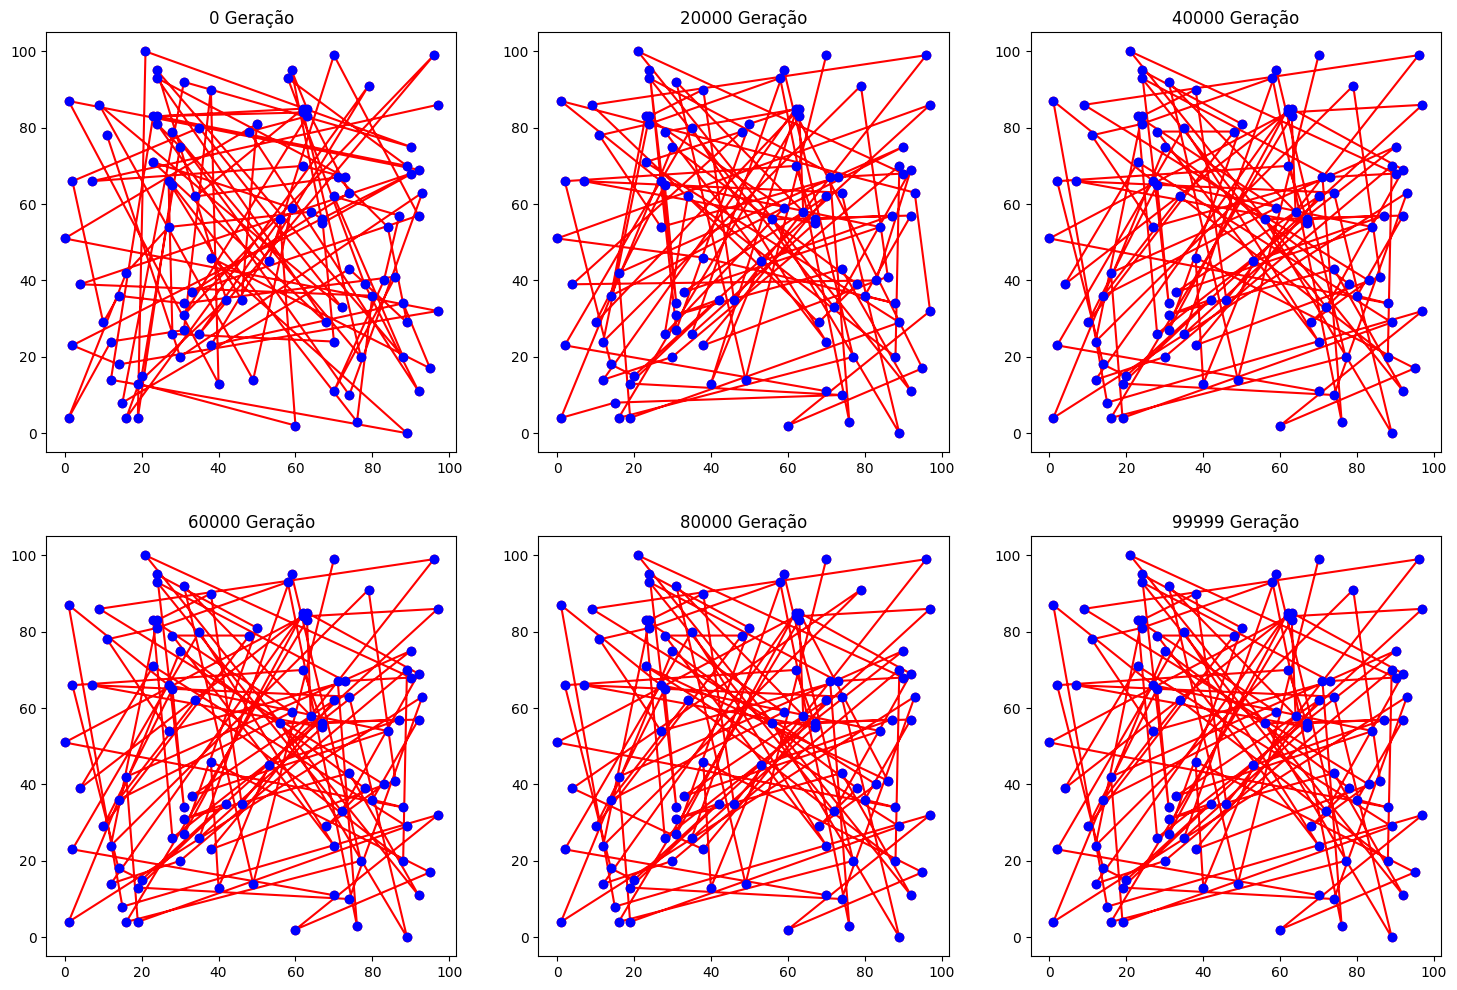

melhor Rota:  [2, 35, 31, 47, 19, 22, 41, 51, 99, 81, 76, 36, 98, 4, 78, 72, 44, 90, 96, 34, 82, 62, 27, 84, 89, 87, 6, 83, 65, 93, 97, 67, 92, 80, 88, 46, 70, 3, 5, 64, 69, 60, 75, 26, 79, 57, 58, 29, 73, 48, 40, 14, 24, 66, 77, 23, 52, 32, 68, 1, 50, 38, 94, 10, 55, 59, 61, 17, 13, 20, 53, 39, 85, 30, 25, 9, 56, 33, 63, 43, 71, 28, 49, 15, 16, 37, 18, 95, 0, 11, 12, 42, 74, 54, 7, 86, 45, 8, 21, 91]


In [56]:
# Cria a população inicial de soluções aleatórias
population = [random.sample(range(num_cities), num_cities) for i in range(population_size)]

# Cria Variáveis para Plotagem de Imagens
title = []
images = []

# Executa as gerações do algoritmo genético
for generation in range(num_generations):
    # Seleciona as soluções mais aptas
    selected = selection(population)
    # Cria a nova população com os filhos do crossover
    new_population = []
    while len(new_population) < population_size - len(selected):
        # Seleciona dois pais aleatórios
        parent1, parent2 = random.sample(selected, 2)
        # Verifica se realiza o crossover com base na taxa definida
        if random.random() < crossover_rate:
            # Realiza o crossover
            child1, child2 = crossover(parent1, parent2)
            # Adiciona os filhos à nova população
            new_population.append(child1)
            new_population.append(child2)
        else:
            # Adiciona os pais à nova população (sem crossover)
            new_population.append(parent1)
            new_population.append(parent2)
    # Adiciona os filhos e os melhores indivíduos selecionados à nova população
    new_population += selected
    # Realiza a mutação em cada indivíduo da nova população com base na taxa definida
    for i in range(population_size):
        if random.random() < mutation_rate:
            new_population[i] = mutation(new_population[i])
    # Atualiza a população
    population = new_population
    # Exibe o custo da melhor solução encontrada até agora
    best_distance = total_distance(selected[0])    

    if generation % 20000 == 0 or generation+1 == num_generations:

      best_route = selected[0]

      route_coordinates = [cities[city-1] for city in best_route]
    
      # Traça a rota das cidades
      x = [coord[0] for coord in route_coordinates]
      y = [coord[1] for coord in route_coordinates]
      
      img = (x,y)

      title.append(str(generation)+" Geração")
      images.append(img)         

fig = plt.gcf()
fig.set_size_inches(18,12)

for i in range(len(images) or 6):
  plt.subplot(2, 3, i+1)

  x,y = images[i]

  plt.plot(x,y, 'ro-')
  plt.plot(x, y, 'bo')
  plt.title(title[i])


plt.show()
# Exibe a melhor rota encontrada
best_route = selected[0]
print("melhor Rota: ", best_route)
